In [1]:
import os
from os import walk
import shutil

# import numpy as np
import pandas as pd
# from PIL import Image
import matplotlib.pyplot as plt

In [2]:
IMAGE_PER_CLASS = 1000
CLASSES = ['Trousers', 'Dress', 'Sweater', 'T-shirt', 'Top', 'Blouse']

In [3]:
def selected_classes(class_name: str):

  if class_name == CLASSES[0] or class_name == CLASSES[1] or class_name == CLASSES[2]:
    return True
  elif class_name == CLASSES[3] or class_name == CLASSES[4] or class_name == CLASSES[5]:
    return True
  else:
    return False

In [4]:
def class_name2num(class_name: str):

  if class_name == CLASSES[0]:
    return 0

  elif class_name == CLASSES[1]:
    return 1

  elif class_name == CLASSES[2]:
    return 2

  elif class_name == CLASSES[3]:
    return 3

  elif class_name == CLASSES[4]:
    return 4

  elif class_name == CLASSES[5]:
    return 5

In [5]:
def copy_images(articles_dic: dict):
    """
    Copies image files from source_dir to target_dir based on the specified extensions.

    Returns:
        None
    """

    target_dir = 'vanilla_dataset'
    train_dir = 'vanilla_dataset/train'
    test_dir = 'vanilla_dataset/test'
    validation_dir = 'vanilla_dataset/validation'

    source_dir = 'h-and-m-personalized-fashion-recommendations/images/'

    # Ensure the target directory exists
    os.makedirs(target_dir, exist_ok=True)

    image_folders = os.listdir(source_dir)

    classes_count = {}
    
    for i in range(len(image_folders)):
        folder_name = image_folders[i]
        if not os.path.isdir(f'{source_dir}/{folder_name}'): continue
        folder_images = os.listdir(f'{source_dir}/{folder_name}')

        for image in folder_images:
            image_id = int(image[1:-4])
            class_name = articles_dic[image_id][0]
            class_num = class_name2num(class_name)

            if(selected_classes(class_name) and classes_count.get(class_name, 0) < IMAGE_PER_CLASS):
                
                image_source_path = os.path.join(source_dir + f'/{folder_name}', image)
                
                # to the train folder
                if (classes_count.get(class_name, 0) < 700):
                    target_folder_path = os.path.join(train_dir + f'/{class_num}')
                
                # to the validation folder
                elif (classes_count.get(class_name, 0) < 850):
                    target_folder_path = os.path.join(validation_dir + f'/{class_num}')

                # to the test folder
                else:
                    target_folder_path = os.path.join(test_dir + f'/{class_num}')

                image_target_path = os.path.join(target_folder_path, image)

                if os.path.exists(image_target_path):
                    print(f"Skipped (already exists): {image_target_path}")
                else:
                    shutil.copy2(image_source_path, target_folder_path)
                    print(f"Copied: {image_source_path} -> {image_target_path}")

                classes_count[class_name] = classes_count.get(class_name, 0) + 1

    print(f'{classes_count=}')

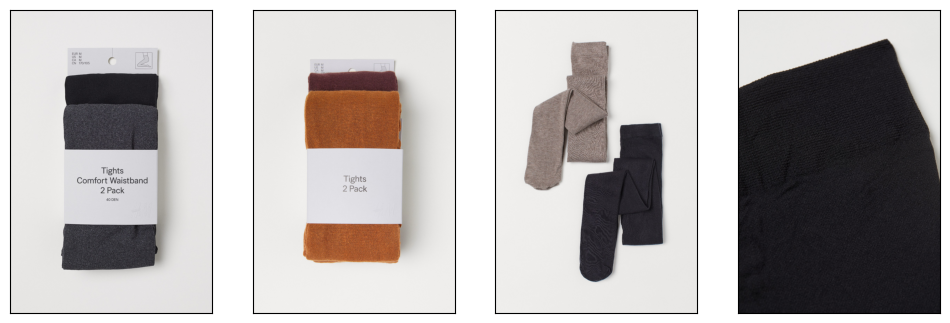

In [8]:
def show_images(folder, no_images=3):

  folder_path = f'h-and-m-personalized-fashion-recommendations/images/{folder}/'

  # extracting all image names from a folder
  files = []

  for _, _, filenames in walk(folder_path):
      files.extend(filenames)

  no_files = len(files)

  if no_images > no_files:
    no_images = no_files
    print("Warning! In the folder there are less images than requested.")

  # plotting selected number of pictures
  images = files[:no_images]
  fig, ax = plt.subplots(1, no_images, figsize=(12,4))
  for i, img in enumerate(images):
      art_id = img.split('.')[0]
      img = plt.imread(folder_path+img)
      ax[i].imshow(img, aspect='equal')
      ax[i].grid(False)
      ax[i].set_xticks([], [])
      ax[i].set_yticks([], [])
  plt.show()

show_images('020', 4)

In [9]:
articles = pd.read_csv('h-and-m-personalized-fashion-recommendations/articles.csv')
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [10]:
articles[['article_id', 'product_type_name']]

,article_id,product_type_name
0,108775015,Vest top
1,108775044,Vest top
2,108775051,Vest top
3,110065001,Bra
4,110065002,Bra
...,...,...
105537,953450001,Socks
105538,953763001,Vest top
105539,956217002,Dress
105540,957375001,Hair clip


### get Images ID & Image Class

In [10]:
articles_dic = articles[['article_id', 'product_type_name']].set_index('article_id').T.to_dict('list')

print({k: articles_dic[k][0] for k in list(articles_dic)[:5]})

{108775015: 'Vest top', 108775044: 'Vest top', 108775051: 'Vest top', 110065001: 'Bra', 110065002: 'Bra'}


### Print the Most Frequent 6 classes in the database

In [12]:
class_count = {}

for id in articles_dic:
  product_type = articles_dic[id][0]

  class_count[product_type] = class_count.get(product_type, 0) + 1


sorted(class_count.items(), key = lambda item: item[1], reverse = True)[:6]

[('Trousers', 11169),
 ('Dress', 10362),
 ('Sweater', 9302),
 ('T-shirt', 7904),
 ('Top', 4155),
 ('Blouse', 3979)]

### Create New Dataset with 1000 images for 6 classes

In [13]:
copy_images(articles_dic)

Copied: h-and-m-personalized-fashion-recommendations/images//024/0249136006.jpg -> vanilla_dataset/train/0/0249136006.jpg
Copied: h-and-m-personalized-fashion-recommendations/images//024/0244267027.jpg -> vanilla_dataset/train/2/0244267027.jpg
Copied: h-and-m-personalized-fashion-recommendations/images//024/0244267032.jpg -> vanilla_dataset/train/2/0244267032.jpg
Copied: h-and-m-personalized-fashion-recommendations/images//024/0240670058.jpg -> vanilla_dataset/train/3/0240670058.jpg
Copied: h-and-m-personalized-fashion-recommendations/images//024/0249136011.jpg -> vanilla_dataset/train/0/0249136011.jpg
Copied: h-and-m-personalized-fashion-recommendations/images//024/0240840032.jpg -> vanilla_dataset/train/0/0240840032.jpg
Copied: h-and-m-personalized-fashion-recommendations/images//024/0249136028.jpg -> vanilla_dataset/train/0/0249136028.jpg
Copied: h-and-m-personalized-fashion-recommendations/images//024/0244267021.jpg -> vanilla_dataset/train/2/0244267021.jpg
Copied: h-and-m-personal